# **US Airlines dataset - EDA**


# **Table of Contents**
* [1.Import and load data](#1)
* [2.Exoloratory Visualization](#2)
  * [Check target](#2.1)
  * [Check correlation](#2.2)
* [3.Analysis](#3)
* [4. Export](#4)


## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="1"></a> <br>
# **1. Imports and load data**

In [14]:
# general purpose packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
import seaborn as sns

# data processing
import re, string

# import nltk

In [5]:
# First, let's load the data
df = pd.read_csv("../data/airline.csv")

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.shape

(14640, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="2"></a> <br>
# **2. Exploratory Visualization**

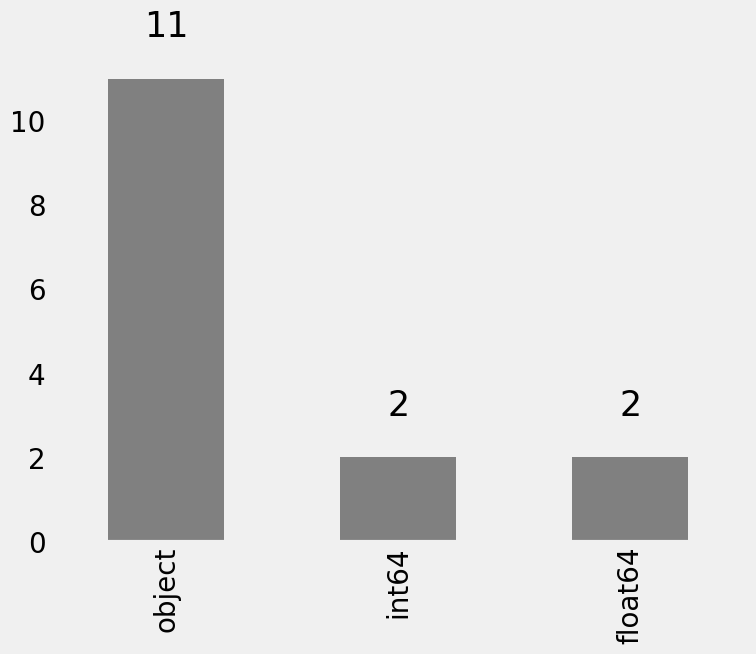

In [15]:
plt.figure(figsize=(8, 6))
ax = df.dtypes.value_counts().plot(kind="bar", grid=False, fontsize=20, color="grey")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.0, height + 1, height, ha="center", size=25)
sns.despine()

Observation:

There are 17 numerical features and 6 object (string) types. Among the numeric features, 6 are int types and 11  are float types. 

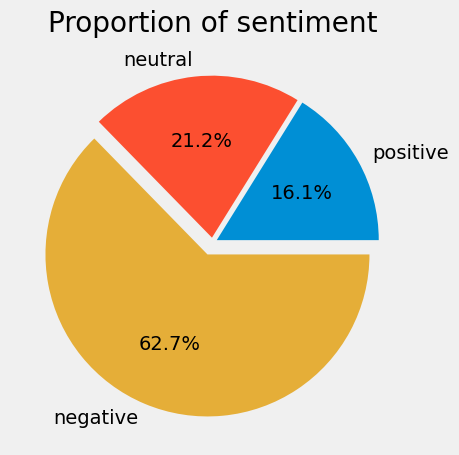

In [16]:
x = df.airline_sentiment.value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x=x, labels=x.index, autopct="%1.1f%%", explode=[0.03, 0.03, 0.08])
plt.title("Proportion of sentiment")

plt.show()

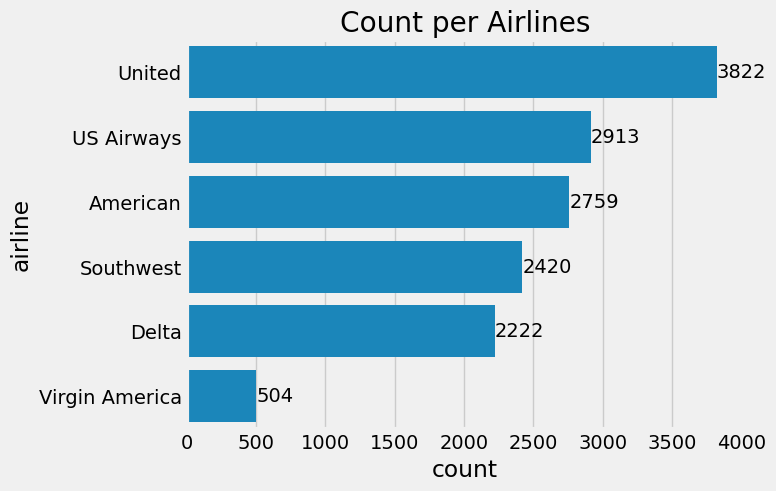

In [29]:
ax = sns.countplot(data=df, y="airline", order=df.airline.value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title(
    "Count per Airlines",
)

plt.show()

The number of tweets concerning each airline: 


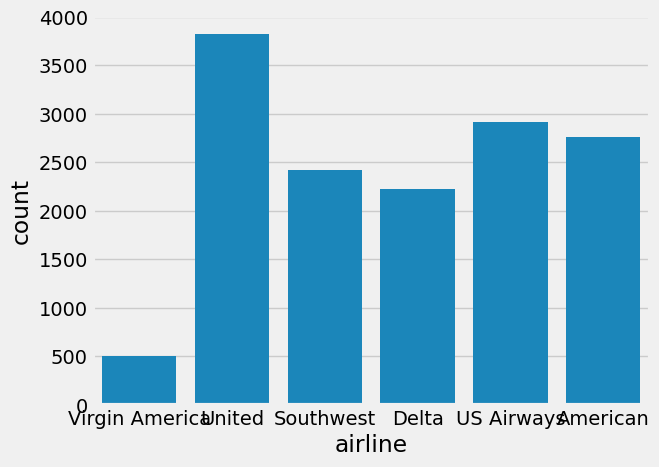

In [19]:
print("The number of tweets concerning each airline: ")
airline_tweet_distribution = sns.countplot(x="airline", data=df)

In [30]:
a = df.groupby(["airline", "airline_sentiment"])["airline_sentiment"].count().unstack()
# a['total'] =  [a.values[x].sum() for x in range(0,6)]
a

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


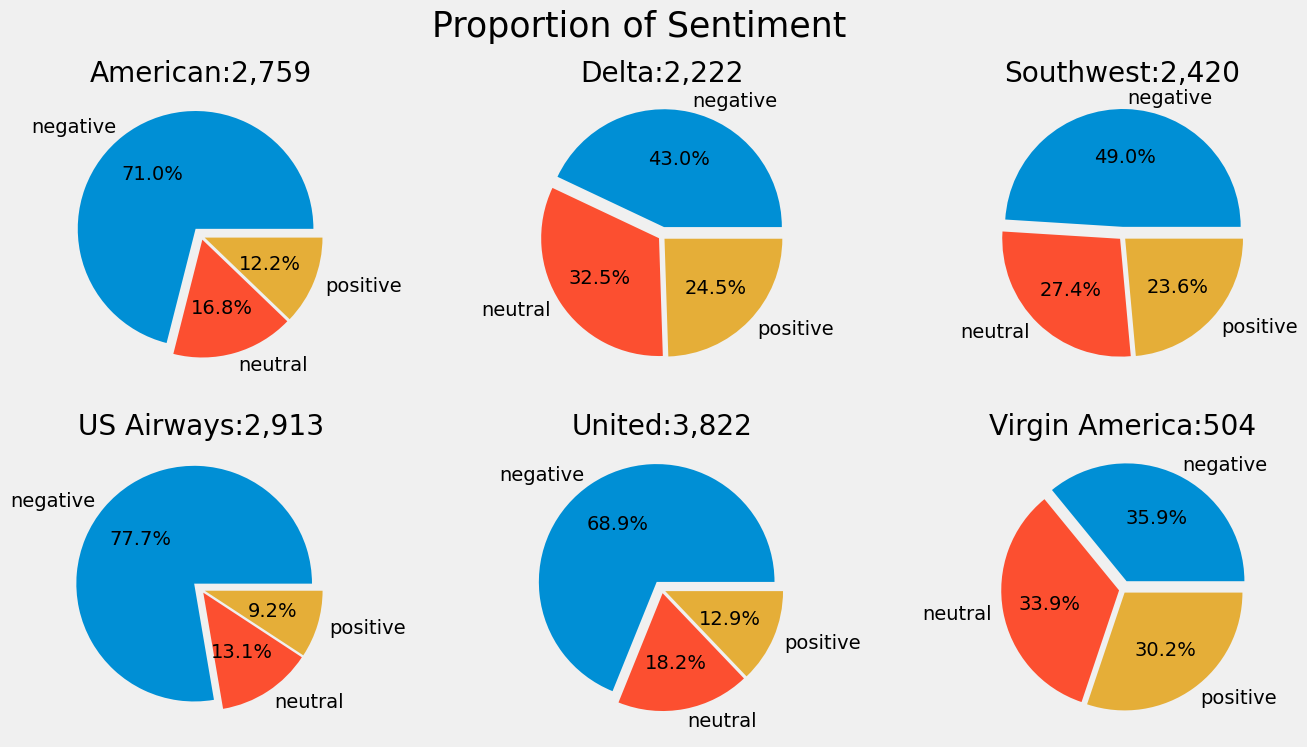

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, ax in zip(range(0, 6), axes):
    temp = a.iloc[i]
    ax.pie(x=temp, labels=temp.index, autopct="%1.1f%%", explode=[0.08, 0.03, 0.03])
    ax.set_title(f"{a.index[i]}:{format(a.values[i].sum(),',')}")

plt.suptitle("Proportion of Sentiment", fontsize=25)
plt.show()

In [33]:
df_neg = df[df.airline_sentiment == "negative"]
display(df_neg.shape, df_neg.head())

(9178, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


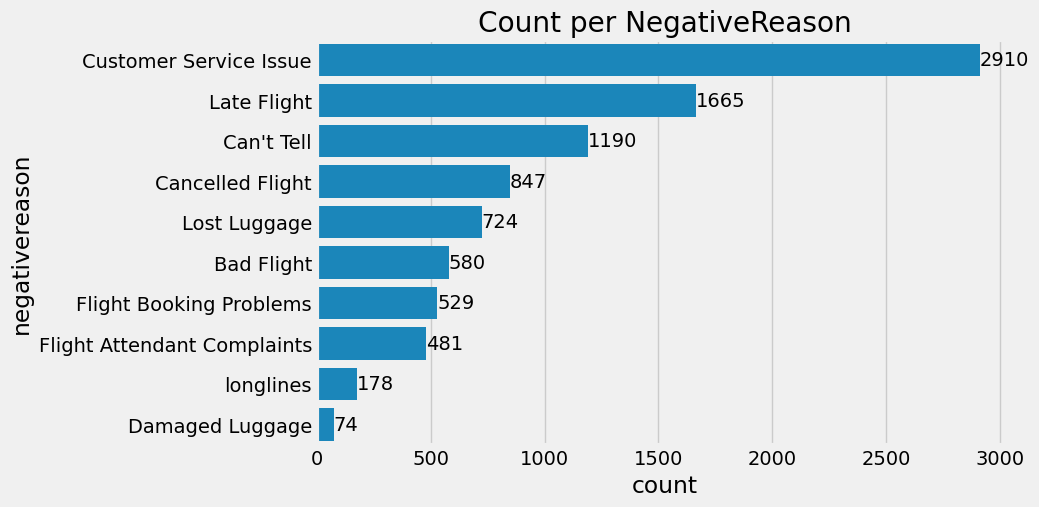

In [35]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df_neg, y="negativereason", order=df_neg.negativereason.value_counts().index
)

ax.bar_label(ax.containers[0])
ax.set_title("Count per NegativeReason")

plt.show()

/home/thiphan/anaconda3/envs/twitter/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiphan/anaconda3/envs/twitter/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/thiphan/anaconda3/envs/twitter/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/hom

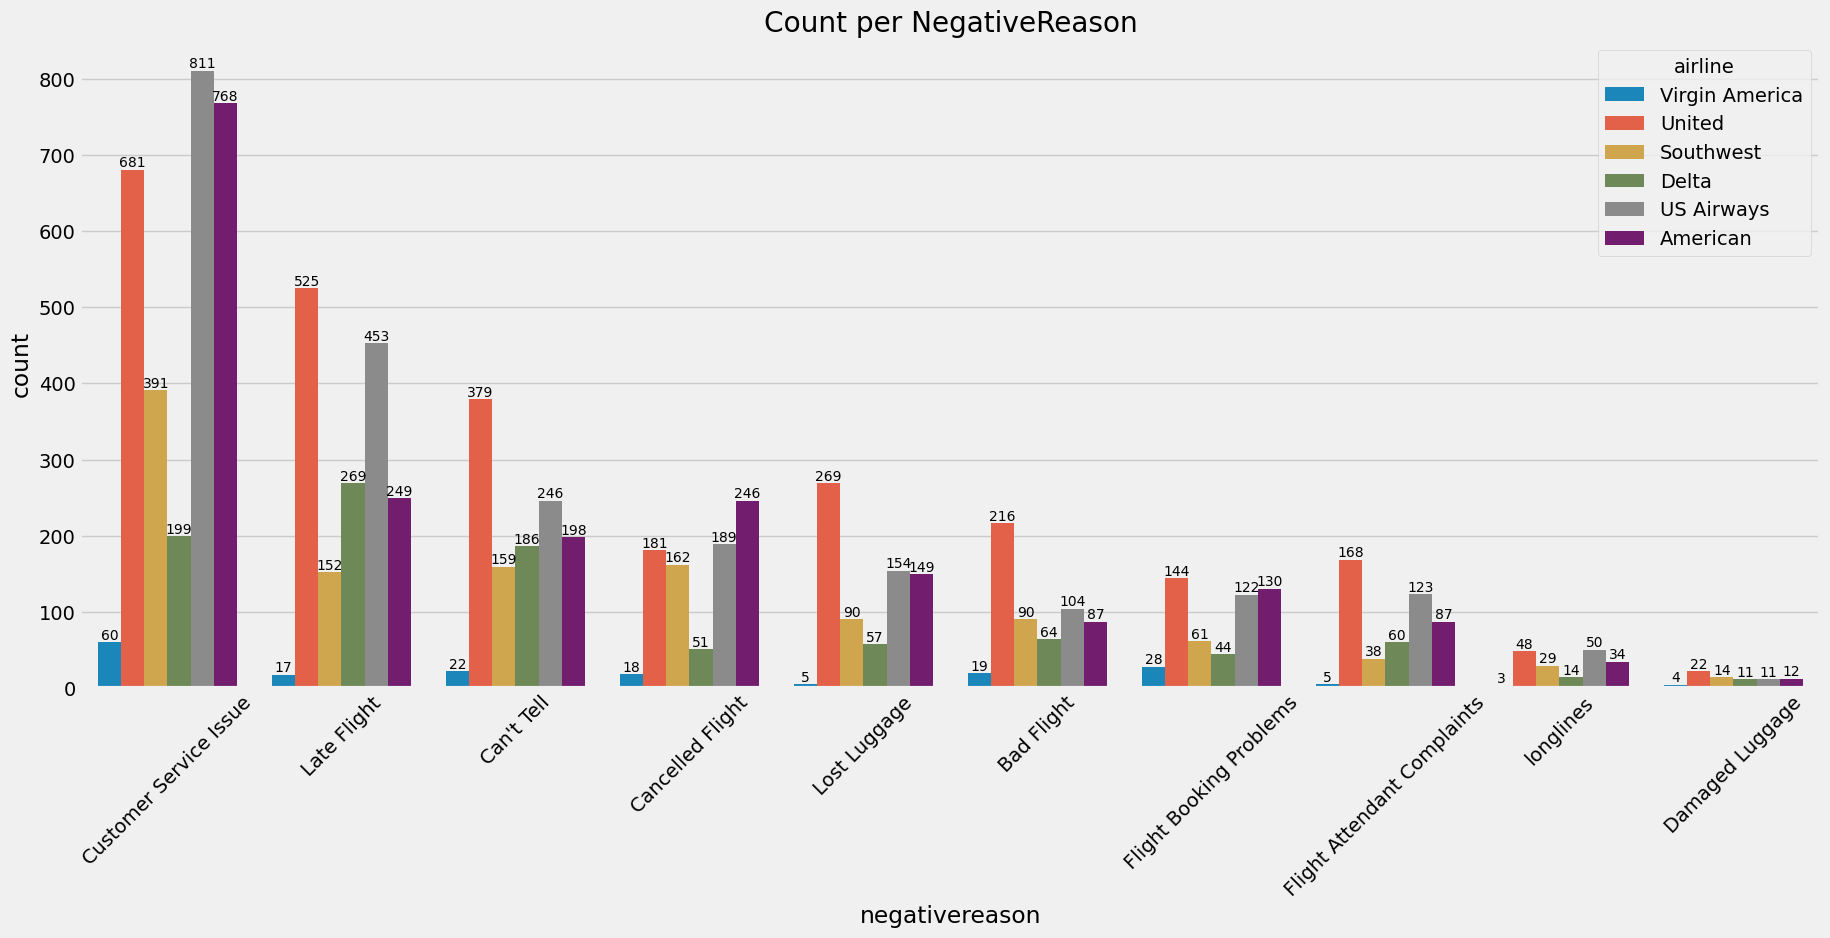

In [40]:
plt.figure(figsize=(20, 8))

# Assuming 'df_neg' is your DataFrame
ax = sns.countplot(
    data=df_neg,
    x="negativereason",
    order=df_neg["negativereason"].value_counts().index,
    hue="airline",
)

# Label each bar with its count
for container in ax.containers:
    ax.bar_label(
        container, fontsize=10, color="black"
    )  # You can customize fontsize and color

ax.set_title("Count per NegativeReason")
plt.xticks(rotation=45)
plt.show()

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="3"></a> <br>
# **3. Data Preprocessing**

In [ ]:
df["airline_sentiment"].replace(
    ("neutral", "positive", "negative"), (0, 1, -1), inplace=True
)
df["airline_sentiment"].value_counts()
# dataset['text'].head()

<a id="3"></a> <br>
# **3. Analysis**